# Practical Assignment 1
## Removing Noise and Artifacts in Biomedical Signals

### Name(s): Jaime Bermejo Torres


### Instructions: 

* **Attendance** at practice labs is **mandatory**.

* You can form **groups of up to 3 members**

* The **deadline** for the submission is **March 9, 23:59** (local time). Delayed submissions will not be accepted.




### Import Packages

In [20]:
#Import Packages

import numpy  as np
import scipy.signal as sig
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.fft import fft, fftfreq, fftshift



## Section 1

<div style="text-align: justify"> 

<br>This practical assignment is devoted to the application of LTI (linear time-invariant) filters for the removal of noise and artifacts in biomedical signals. In particular, we will work with an **electromyogram (EMG)** signal that was acquired in the laboratory when the power supply was connected. As a consequence, the EMG is **distorted with powerline interferences and noise**. 
    
Powerline interference is particularly problematic due to its higher-order contributions. In Europe, the main frequency contribution of powerline interference is located at 50 Hz. As a consequence, **higher-order harmonics** will be located at $f_{harmonic} = 50k$ Hz, $k=2,3,4,...$; namely, at 100 Hz, 150 Hz, 200 Hz, etc. For a nice filtering of the EMG, it is not enough to eliminate the 50 Hz frequency, we also have to eliminate higher-order harmonics. This can be done with the application of **comb** filters.
    
</div>


### Visualizing the Frequency Response


<div style="text-align: justify"> 
    
    
<br>Load the signal "emg4.csv". This signal, sampled at 1 kHz, contains an electromyogram (EMG) distorted with noise and power line interference. Plot the frequency response of the biomedical signal and locate the undesired artifacts. You can work with decibel units for a better visualization.
    
Don't forget to label the axes!!!
    
</div>


(12100, 6)
[591. 646. 661. ... 412. 446. 510.]


Text(0, 0.5, 'Amplitud (mV)')

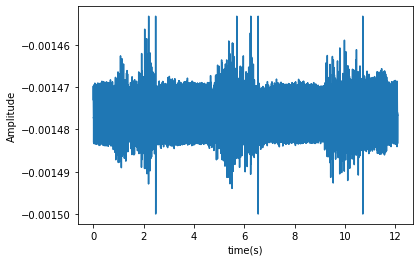

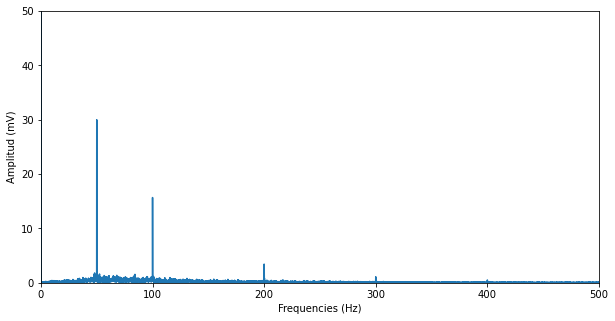

In [108]:
### Programming Section 1: Visualizing the Frequency Response

signal = np.loadtxt("emg4.csv", delimiter=",")
print(signal.shape)
print(signal[:,-1])

emg_sig = signal[:,-1]
time = np.arange(0, 12.1, 1/fs)

fs = 1000#Hz
n=16
G_emg=1000
VCC=3

emg = (((emg_sig/2**n)-(1/2))*(VCC))/(G_emg)
emg_mV=emg*1000


emg_db = 20*np.log10(emg+1)
#plt.plot(time, emg_db)
plt.plot(time, emg)
plt.xlabel("time(s)")
plt.ylabel("Amplitude") #Duda: Los valores del electromiograma en que unidades están? o Habría que aplicar la formula de la documentación del tema 1?

#Fourier
EMG = fft(emg_mV)
F = fftfreq(len(EMG))

plt.figure(figsize=(10,5))
plt.plot(fftshift(F)*fs , fftshift(abs(EMG)))
plt.xlim(0,500)
plt.ylim(0,50)
plt.xlabel('Frequencies (Hz)')
plt.ylabel('Amplitud (mV)')


### Reconstructing the Power Line Interference

<div style="text-align: justify"> 

<br>Ideally, power line interference should resemble a perfect sinusoidal wave. However, higher-order harmonics (100 Hz, 150 Hz, 200 Hz) are distorting its shape. Check the amplitude level of the different harmonics in the frequency domain and try to reconstruct the power line interference. That is, $$x_{recon}(t) = \sum_k A_k \sin(2\pi50kt)$$. Use 2 or 3 higher-order harmonics at most. Compare the reconstructed power line interference to a 50-Hz perfect sinusoidal wave.

</div>

[3.437, 15.683, 29.992, 17867.123, 29.992, 15.683, 3.437]


(0.0, 0.25)

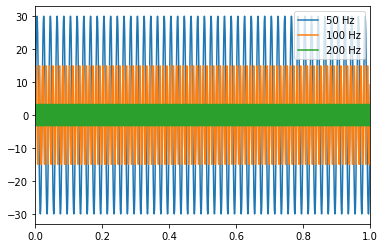

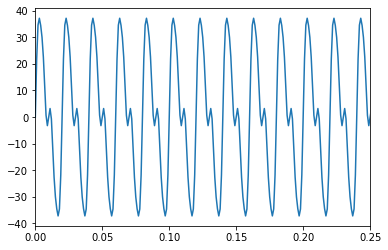

In [112]:
### Programming Section 1: Reconstructing the Power Line Interference
tmp=[]


for num in fftshift(abs(EMG)):
    if num > 3:
        tmp.append(round(num, 3))
print(tmp)

sig3=tmp[0]*np.sin(2*np.pi*200*time)
sig2=tmp[1]*np.sin(2*np.pi*100*time)
sig1=tmp[2]*np.sin(2*np.pi*50*time)

plt.figure()
plt.plot(time, sig1, label="50 Hz")
plt.plot(time, sig2, label="100 Hz")
plt.plot(time, sig3, label="200 Hz")
plt.xlim(0,1)
plt.legend()

signal_sum=sig1+sig2+sig3
plt.figure()
plt.plot(time, signal_sum)
plt.xlim(0,0.25)

## Section 2: Comb filter

<div style="text-align: justify">

<br>For the removal of the 50-Hz contribution and higher-order harmonics, a **comb filter** should be designed. A comb filter, named after the shape of its frequency response, is simply a **concatenation of several Notch filters**.

There are different ways of implementing a comb filter in Python. The simplest one is to use the [sig.iircomb](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.iircomb.html) function. In our case, we will try to implemement a comb filter **manually**; namely, by **cascading several Notch filters** of different frequencies. By doing so, we should remember some interesting properties related to LTI systems (impulse response, relation between multiplication and convolution operations, etc.). 
    
A single Notch filter can be implemented by using the [sig.iirnotch](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.iirnotch.html) function. Remember that a Notch filter is characterized by two parameters: its critical frequency (the frequency to remove), and the quality factor Q (larger Q, smaller bandwidth to reject). 
    
Plot the frequency response of the comb filter. Then, filter the distorted and noisy EMG and compare it to the original "emg4.csv" signal. Don't forget to label the axes!!!    
    
</div>

In [4]:
### Programming Section 2: Comb filter




## Section 3: Removing Noise with Wiener Filters

<div style="text-align: justify">
    
<br>Wiener filters are able to exploit **our knowledge about the statistical properties** of random signals (in our case, white noise) to eliminate it. Check the properties of [sig.wiener](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.wiener.html) function and implement a Wiener filter to eliminate the noise of the previously filtered EMG. 
    
Compare the final signal (comb-Wiener filtered) with the comb-filtered signal and the original noisy EMG. Plot the frequency response of the signals as well. Don't forget to label the axes!!!
    
</div>

In [5]:
### Programming Section 3: Wiener filter




## Questions
#### 1. What are the main differences between IIR and FIR filters?

#### 2. How two different filters (defined by their corresponding b and a coefficients) can be cascaded?

#### 3. How does a Wiener filter work?